<a href="https://colab.research.google.com/github/owenc8/CV_Project_freshVSrotten/blob/test_2/CV_project_bananas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To-DO
#Convert Txt files to XML and run the code below
#train the data
# -
# -
# get code from: ComputerVisionProject.ipynb and
# YOLOv8_Tutorial.ipynb

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import seaborn as sns
import glob
import xml.etree.ElementTree as ET
from PIL import Image
import os
import shutil

In [ ]:
test_dir = '/content/drive/MyDrive/LabFruit/Test'
train_dir = '/content/drive/MyDrive/LabFruit/Train'

In [ ]:
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/images')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/labels')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/images/train')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/images/val')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/labels/train')
os.makedirs('/content/drive/MyDrive/LabFruit/Final_data/labels/val')

In [ ]:
label_dir= "/content/drive/MyDrive/LabFruit/Final_data/labels"
image_dir="/content/drive/MyDrive/LabFruit/Final_data/images"

In [ ]:
#import shutil
#run it once for copying!
for file in os.listdir(train_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(train_dir, file), os.path.join(label_dir, "train"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(train_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"train", new_filename), "JPEG")
        #shutil.copy(os.path.join(train_dir, file), os.path.join(image_dir, "train"))


#Copy XML files and jpg files from the test folder to the folders created.
for file in os.listdir(test_dir):
    if file.endswith(".xml"):
        shutil.copy(os.path.join(test_dir, file), os.path.join(label_dir, "val"))
    if file.endswith(".jpg"):
        image = Image.open(os.path.join(test_dir, file))
        image = image.convert("RGB")
        new_filename = os.path.splitext(file)[0] + ".jpg"
        image.save(os.path.join(image_dir,"val", new_filename), "JPEG")
        #shutil.copy(os.path.join(test_dir, file), os.path.join(image_dir, "val"))

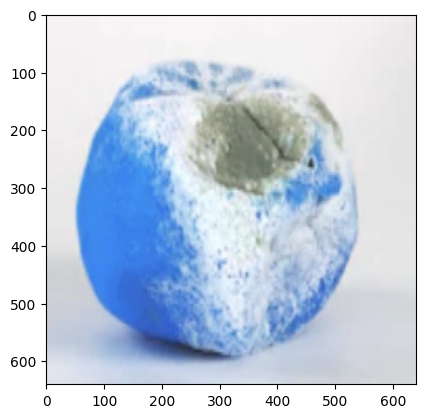

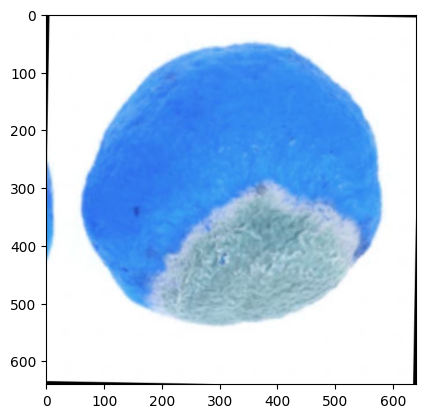

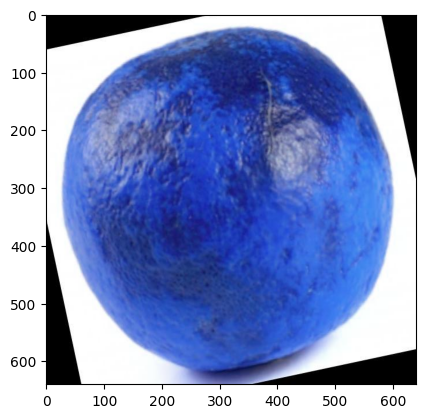

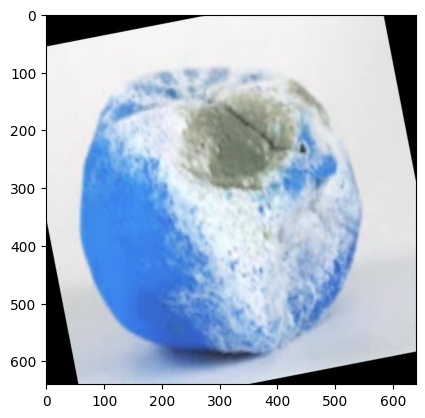

In [ ]:
for idx, image in enumerate(os.listdir(os.path.join(image_dir, "train"))):
    img = cv2.imread(os.path.join(image_dir,"train", image), 1)
    plt.imshow(img)
    plt.show()

    if idx == 3:
        break

In [ ]:
df = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}


#This is the way to handle xml format files which are in heirarchial form (trees).

for idx, anno in enumerate(glob.glob(label_dir+"/train" + '/*.xml')):

    trees = ET.parse(anno)

    print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df['label'] += [label]
                    df['width'] += [width]
                    df['height'] += [height]
                    df['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df['ymax'] += [ymax]

Streaming output truncated to the last 5000 lines.
<Element 'difficult' at 0x7b5afae167a0>
<Element 'occluded' at 0x7b5afae16d40>
<Element 'bndbox' at 0x7b5afae171a0>
<Element 'xmin' at 0x7b5afae16520>
<Element 'xmax' at 0x7b5afae17ce0>
<Element 'ymin' at 0x7b5afae172e0>
<Element 'ymax' at 0x7b5afa531d50>
/content/drive/MyDrive/LabFruit/Final_data/labels/train/apple_5_jpg.rf.d0fcfdaaafa01ffd6d7fd65f4170c28c.xml
<Element 'annotation' at 0x7b5afae33ce0>
<Element 'folder' at 0x7b5afae32520>
<Element 'filename' at 0x7b5afae32e80>
<Element 'path' at 0x7b5afae33240>
<Element 'source' at 0x7b5afae33c90>
<Element 'database' at 0x7b5afae33dd0>
<Element 'size' at 0x7b5afae33a60>
<Element 'width' at 0x7b5afae32c00>
<Element 'height' at 0x7b5afae33b00>
<Element 'depth' at 0x7b5afae32980>
<Element 'segmented' at 0x7b5afae33470>
<Element 'object' at 0x7b5afae32d90>
<Element 'name' at 0x7b5afae337e0>
<Element 'pose' at 0x7b5afae32cf0>
<Element 'truncated' at 0x7b5afae33600>
<Element 'difficult' at 0x

In [ ]:
df2 = {'name': [],
      'label': [],
      'width': [],
      'height': [],
     'xmin': [],
     'ymin': [],
     'xmax': [],
     'ymax': []}

for idx, anno in enumerate(glob.glob(label_dir+"/val" + '/*.xml')):

    trees = ET.parse(anno)

    #print(anno)
    root = trees.getroot()
    width, height = [], []
    for item in root.iter():
        #print(item)

        if item.tag == 'size':
            for attr in list(item):
                if attr.tag == 'width':
                    width =int(round(float(attr.text)))
                if attr.tag == 'height':
                    height = int(round(float(attr.text)))

        if item.tag == 'object':
            for attr in list(item):
                if 'name' in attr.tag:
                    label = attr.text
                    df2['label'] += [label]
                    df2['width'] += [width]
                    df2['height'] += [height]
                    #dataset['name']+=[anno.split('/')[-1][0:-4]]
                    df2['name'] += [anno.split('/')[-1][0:-4]]

                if 'bndbox' in attr.tag:
                    for dim in attr:
                        if dim.tag == 'xmin':
                            xmin = int(round(float(dim.text)))
                            df2['xmin'] += [xmin]

                        if dim.tag == 'ymin':
                            ymin = int(round(float(dim.text)))
                            df2['ymin'] += [ymin]
                        if dim.tag == 'xmax':
                            xmax = int(round(float(dim.text)))
                            df2['xmax'] += [xmax]
                        if dim.tag == 'ymax':
                            ymax = int(round(float(dim.text)))
                            df2['ymax'] += [ymax]

In [ ]:
import pandas as pd
train_df = pd.DataFrame(df)
val_df=pd.DataFrame(df2)
#df1.head()
val_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax
0,Screen-Shot-2018-06-07-at-2-45-44-PM_png.rf.8e...,rotten_apple,640,640,46,11,576,576
1,Screen-Shot-2018-06-07-at-2-23-51-PM_png.rf.ec...,rotten_apple,640,640,61,35,594,620
2,Screen-Shot-2018-06-07-at-2-35-21-PM_png.rf.44...,rotten_apple,640,640,30,46,621,602
3,Screen-Shot-2018-06-07-at-2-46-22-PM_png.rf.3f...,rotten_apple,640,640,28,98,525,579
4,Screen-Shot-2018-06-07-at-3-05-46-PM_png.rf.65...,rotten_apple,640,640,79,59,563,609


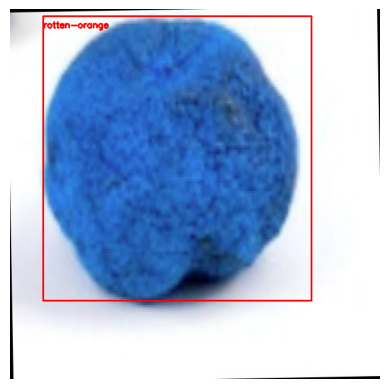

In [ ]:
index= 10 #picture to visualize

#import cv2
image = cv2.imread(os.path.join(image_dir,"train", train_df["name"][index]+".jpg"), 1)
# Draw rectangle
cv2.rectangle(image, (train_df['xmin'][index], train_df['ymin'][index]), (train_df['xmax'][index], train_df['ymax'][index]), (255, 0, 0), 2)
# Put label (class_id) near the bbox
label = train_df["label"][index]
cv2.putText(image, str(label), (train_df['xmin'][index], train_df['ymin'][index]+20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
# Display image
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
train_df["name"][index]
filtered_df = train_df[train_df['name'] == train_df["name"][index]]
print(filtered_df)

                                                 name          label  width  \
10  Screen-Shot-2018-06-12-at-11-23-24-PM_png.rf.2...  rotten-orange    640   

    height  xmin  ymin  xmax  ymax  
10     640    57    12   521   504  


In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    290 non-null    object
 1   label   290 non-null    object
 2   width   290 non-null    int64 
 3   height  290 non-null    int64 
 4   xmin    290 non-null    int64 
 5   ymin    290 non-null    int64 
 6   xmax    290 non-null    int64 
 7   ymax    290 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 18.2+ KB


In [ ]:
print(train_df['label'].unique())
print(val_df['label'].unique())

['rotten-orange' 'rotten-banana' 'rotten_apple' 'banana' 'orange' 'apple'
 'tomato' 'rotten_tomato']
['rotten_apple' 'rotten-orange' 'rotten-banana' 'apple' 'banana' 'orange'
 'tomato' 'rotten_tomato']


In [ ]:
label_map = { 'apple': 0,
            'rotten_apple': 1,
            'banana': 2,
              'rotten-banana':3,
              'orange': 4,
              'rotten-orange': 5,
              'tomato': 6,
              'rotten_tomato' : 7}

train_df['class'] = train_df['label'].map(label_map)
val_df['class'] = val_df['label'].map(label_map)

In [ ]:
# Training data
train_df['x_center'] = (train_df['xmin']+train_df['xmax'])/(2*train_df["width"])
train_df['y_center'] = (train_df['ymin']+train_df['ymax'])/(2*train_df["height"])
train_df['box_width'] = (train_df['xmax']-train_df['xmin'])/ train_df["width"]
train_df['box_height'] = (train_df['ymax']-train_df['ymin'])/train_df["height"]

#Validation data
val_df['x_center'] = (val_df['xmin']+val_df['xmax'])/(2*val_df["width"])
val_df['y_center'] = (val_df['ymin']+val_df['ymax'])/(2*val_df["height"])
val_df['box_width'] = (val_df['xmax']-val_df['xmin'])/ val_df["width"]
val_df['box_height'] = (val_df['ymax']-val_df['ymin'])/val_df["height"]

In [ ]:
train_df.head()

,name,label,width,height,xmin,ymin,xmax,ymax,class,x_center,y_center,box_width,box_height
0,Screen-Shot-2018-06-12-at-11-24-12-PM_png.rf.b...,rotten-orange,640,640,46,82,537,581,5,0.455469,0.517969,0.767188,0.779687
1,Screen-Shot-2018-06-12-at-11-24-24-PM_png.rf.7...,rotten-orange,640,640,62,3,562,584,5,0.487500,0.458594,0.781250,0.907813
2,Screen-Shot-2018-06-12-at-11-23-29-PM_png.rf.d...,rotten-orange,640,640,50,28,604,624,5,0.510938,0.509375,0.865625,0.931250
3,Screen-Shot-2018-06-12-at-11-24-43-PM_png.rf.e...,rotten-orange,640,640,1,1,641,641,5,0.501563,0.501563,1.000000,1.000000
4,Screen-Shot-2018-06-12-at-11-25-11-PM_png.rf.d...,rotten-orange,640,640,1,1,641,641,5,0.501563,0.501563,1.000000,1.000000


In [ ]:
#training
print("before deleting (train data): " , train_df.shape)
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
train_df.dropna(inplace=True)
print("after deleting(train_data): " ,train_df.shape)

#validation
print("before deleting (val data): " , val_df.shape)
val_df.replace([np.inf, -np.inf], np.nan, inplace=True)
val_df.dropna(inplace=True)
print("after deleting(val data): " , val_df.shape)

before deleting (train data):  (3271, 13)
after deleting(train_data):  (3271, 13)
before deleting (val data):  (290, 13)
after deleting(val data):  (290, 13)


In [ ]:
train_df = train_df.astype(str)
val_df = val_df.astype(str)

In [ ]:
#file_name = [x.split('.')[0] for x in df1["name"]]

#TRAINING DATA
#finding all the unique names:
unique_names= train_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = train_df[train_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/train/{name}.txt', 'w') as file:
            file.write(text)
#############################################################################################
#VALIDATION DATA
#finding all the unique names:
unique_names= val_df['name'].unique()

#for each unique name, containing multiple bboxes, combine them together.
for name in unique_names:
  data = val_df[val_df.name == name]
  box_list = []
  for idx in range(len(data)):
        row = data.iloc[idx]
        box_list.append(row['class']+" "+row['x_center']+" "+row['y_center']+" "+ row['box_width']+" "+row['box_height'])

#writing on text files
  text = "\n".join(box_list)
  with open(f'{label_dir}/val/{name}.txt', 'w') as file:
            file.write(text)

DETECTION WITH YOLO

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

In [29]:
model = YOLO('yolov8s.pt') # pretrained model

In [24]:
%%writefile config.yaml
path: /content/drive/MyDrive/LabFruit/Final_data
train: /content/drive/MyDrive/LabFruit/Final_data/images/train
#test: (test dataset folder path)
val: /content/drive/MyDrive/LabFruit/Final_data/images/val

# Classes
nc: 8 # replace based on your dataset's number of classes

# Class names
# replace all class names with your own classes' names
names:
  0: apple
  1: rotten_apple
  2: banana
  3: rotten-banana
  4: orange
  5: rotten-orange
  6: tomato
  7: rotten_tomato


  # label_map = { 'apple': 0,
  #           'rotten_apple': 1,
  #           'banana': 2,
  #             'rotten-banana':3,
  #             'orange': 4,
  #             'rotten-orange': 5,
  #             'tomato': 6,
  #             'rotten_tomato' : 7}

Writing config.yaml


In [30]:
#they said to look at yolo training docs before doing this
#https://docs.ultralytics.com/modes/train/

#epochs: Total number of training epochs. Each epoch represents a full pass over the entire dataset. Adjusting this value can affect training duration and model performance
#patience:Number of epochs to wait without improvement in validation metrics before early stopping the training. Helps prevent overfitting by stopping training when performance plateaus.
#batch size: Batch size, with three modes: set as an integer (e.g., batch=16), auto mode for 60% GPU memory utilization (batch=-1), or auto mode with specified utilization fraction (batch=0.70).
#lr0: Initial learning rate (i.e. SGD=1E-2, Adam=1E-3) . Adjusting this value is crucial for the optimization process, influencing how rapidly model weights are updated.
#imgsz: Target image size for training. All images are resized to this dimension before being fed into the model. Affects model accuracy and computational complexity.

model.train(data="config.yaml",epochs=1,patience=1,batch=8, lr0=0.0005,imgsz=640)

#default
# model.train(data="config.yaml",epochs=5,patience=5,batch=8, lr0=0.0005,imgsz=640)
#model.train(data="config.yaml",epochs=5,patience=4,batch=16, lr0=0.001,imgsz=640)

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=1, time=None, patience=1, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=Non

train: Scanning /content/drive/MyDrive/LabFruit/Final_data/labels/train.cache... 2013 images, 15 backgrounds, 0 corrupt: 100%|██████████| 2028/2028 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/LabFruit/Final_data/labels/val.cache... 201 images, 1 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G      1.203      2.257      1.638         16        640: 100%|██████████| 254/254 [1:30:26<00:00, 21.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [03:01<00:00, 13.94s/it]


                   all        202        290      0.524      0.478      0.355      0.252

1 epochs completed in 1.564 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 22.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [02:49<00:00, 13.02s/it]


                   all        202        290      0.525      0.481      0.354      0.253
                 apple         26         33      0.414      0.879      0.489       0.35
          rotten_apple         48         48      0.356          1      0.887      0.743
                banana         25         50      0.415      0.498       0.41      0.131
         rotten-banana         47         82    0.00798        0.5    0.00748    0.00319
                orange         20         28    0.00547        0.5     0.0177    0.00971
         rotten-orange         35         37          1      0.476       0.87       0.73
                tomato          6          6          1          0      0.153     0.0532
         rotten_tomato          6          6          1          0    0.00188   0.000672
Speed: 3.4ms preprocess, 813.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b7343d531f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

In [31]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category
metrics.box.mp    # P
metrics.box.mr    # R

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,128,680 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning /content/drive/MyDrive/LabFruit/Final_data/labels/val... 201 images, 1 backgrounds, 0 corrupt: 100%|██████████| 202/202 [00:55<00:00,  3.64it/s]


val: New cache created: /content/drive/MyDrive/LabFruit/Final_data/labels/val.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [03:13<00:00,  7.43s/it]


                   all        202        290      0.487      0.533      0.371      0.256
                 apple         26         33       0.32      0.879      0.474       0.34
          rotten_apple         48         48      0.306          1      0.886      0.743
                banana         25         50      0.296       0.52       0.41      0.131
         rotten-banana         47         82    0.00819      0.585    0.00753    0.00321
                orange         20         28    0.00626      0.679     0.0178    0.00974
         rotten-orange         35         37      0.957      0.599      0.871      0.732
                tomato          6          6          1          0      0.296      0.084
         rotten_tomato          6          6          1          0    0.00933     0.0029
Speed: 3.2ms preprocess, 930.6ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train32


0.5327677030732416

In [47]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/train/confusion_matrix_normalized.png')

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/confusion_matrix_normalized.png'

PREDICTION

In [36]:
model = YOLO('yolov8s')  # load a custom model

# Predict with the model with any image from internet?
results = model('https://www.freshpoint.com/wp-content/uploads/2019/08/freshpoint-produce-101-apples-bananas.jpg', save=True)


Found https://www.freshpoint.com/wp-content/uploads/2019/08/freshpoint-produce-101-apples-bananas.jpg locally at freshpoint-produce-101-apples-bananas.jpg
image 1/1 /content/freshpoint-produce-101-apples-bananas.jpg: 576x640 1 banana, 2 apples, 665.2ms
Speed: 3.5ms preprocess, 665.2ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict7


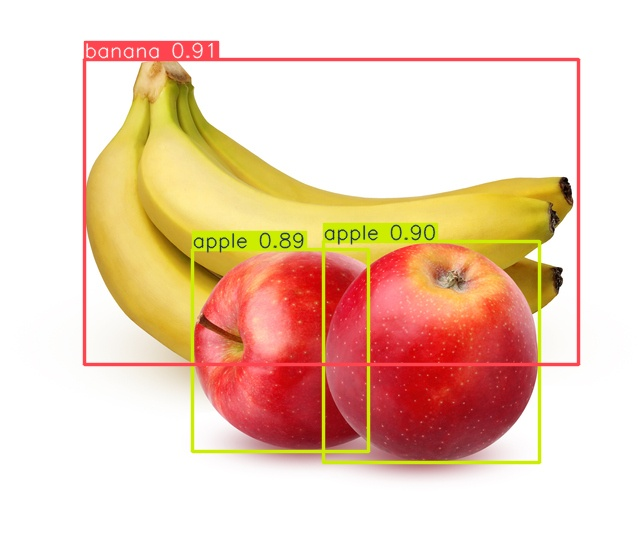

In [37]:
# SHOW THE IMAGE STORED
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict7/freshpoint-produce-101-apples-bananas.jpg')

In [50]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('/content/moldy_test_apple1.jpg', save=True)


image 1/1 /content/moldy_test_apple1.jpg: 576x640 1 rotten-orange, 202.1ms
Speed: 5.4ms preprocess, 202.1ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)
Results saved to runs/detect/predict11


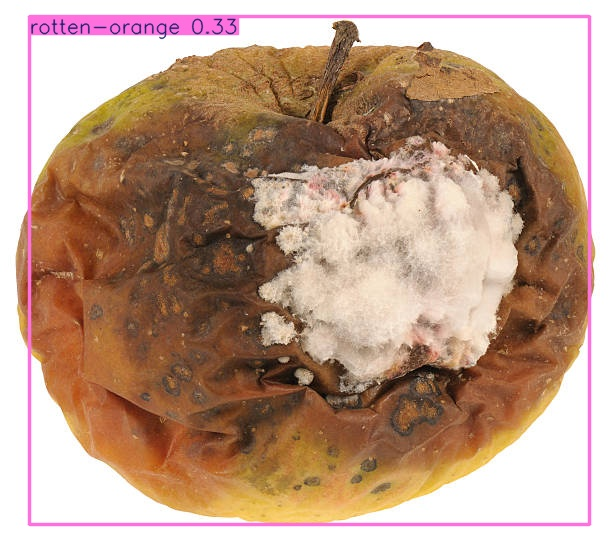

In [51]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict11/moldy_test_apple1.jpg')

In [52]:
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('https://st2.depositphotos.com/2082539/7520/i/950/depositphotos_75202333-stock-photo-two-different-apples-fresh-and.jpg', save=True)


Found https://st2.depositphotos.com/2082539/7520/i/950/depositphotos_75202333-stock-photo-two-different-apples-fresh-and.jpg locally at depositphotos_75202333-stock-photo-two-different-apples-fresh-and.jpg
image 1/1 /content/depositphotos_75202333-stock-photo-two-different-apples-fresh-and.jpg: 448x640 1 apple, 169.9ms
Speed: 4.4ms preprocess, 169.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict12


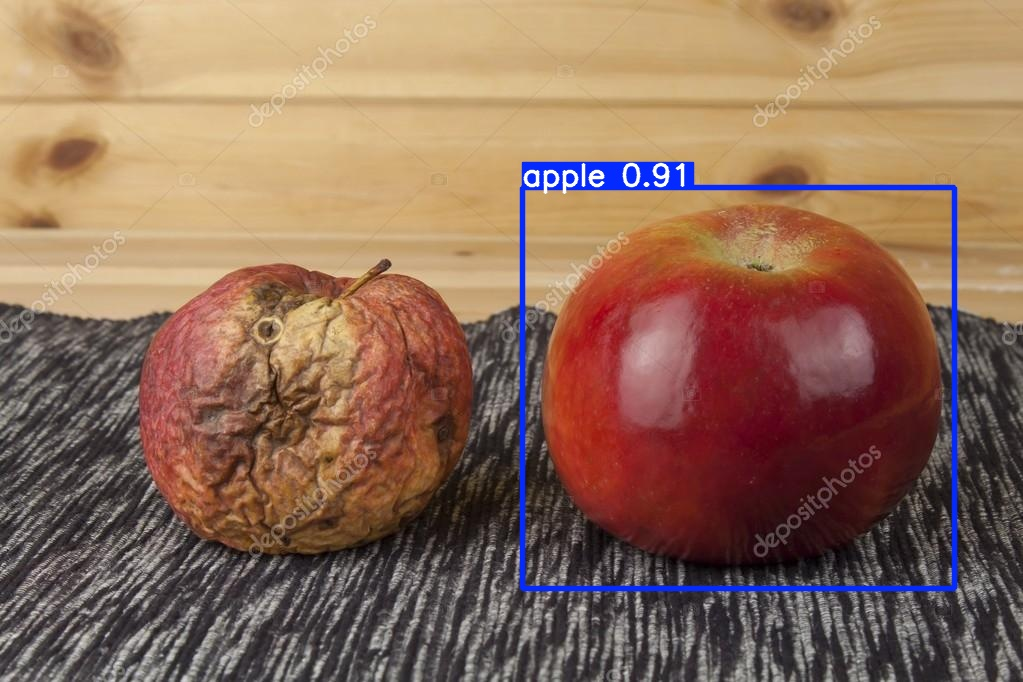

In [53]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict12/depositphotos_75202333-stock-photo-two-different-apples-fresh-and.jpg')

In [55]:
#https://us.images.westend61.de/0000047565pw/moldy-apple-close-up-08224CS-U.jpg
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('https://s3.us-west-2.amazonaws.com/treefruit.wsu.edu/wp-content/uploads/2020/04/20135432/Blue-mold_A-fuji.png', save=True)

100%|██████████| 162k/162k [00:00<00:00, 1.40MB/s]


image 1/1 /content/Blue-mold_A-fuji.png: 640x576 1 rotten_apple, 1 rotten-orange, 304.4ms
Speed: 4.2ms preprocess, 304.4ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 576)
Results saved to runs/detect/predict13


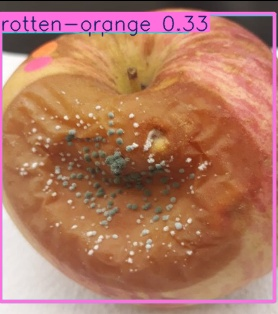

In [56]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict13/Blue-mold_A-fuji.jpg')

In [62]:
#https://us.images.westend61.de/0000047565pw/moldy-apple-close-up-08224CS-U.jpg
model = YOLO('/content/runs/detect/train2/weights/best.pt')  # load a custom model

# Predict with the model with any image from internet?
results = model('https://www.shutterstock.com/image-photo/rotten-banana-white-mold-on-260nw-1124255483.jpg', save=True)

100%|██████████| 20.8k/20.8k [00:00<00:00, 16.7MB/s]


image 1/1 /content/rotten-banana-white-mold-on-260nw-1124255483.jpg: 544x640 3 rotten-bananas, 397.0ms
Speed: 6.9ms preprocess, 397.0ms inference, 1.6ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict17


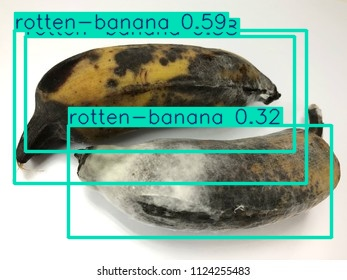

In [63]:
%matplotlib inline
from PIL import Image

Image.open('/content/runs/detect/predict17/rotten-banana-white-mold-on-260nw-1124255483.jpg')